## Thyroid Disease

**Actualizado**: 11-04-2023 20:05

**Referencia**: https://www.kaggle.com/code/yasserhessein/thyroid-disease-detection-using-deep-learning/notebook

**Hipotiroidismo** e **hipertiroidismo** son dos afecciones médicas relacionadas con la glándula tiroides, que es una glándula ubicada en el cuello que produce hormonas importantes para regular el metabolismo del cuerpo. A continuación te explico en qué consiste cada una de estas afecciones:

**Hipotiroidismo**: es una condición en la que la glándula tiroides no produce suficientes hormonas tiroideas. Esto puede ser causado por diversas razones, como inflamación de la tiroides, radioterapia, enfermedades autoinmunitarias, entre otras. Los síntomas del hipotiroidismo incluyen cansancio, aumento de peso, piel seca, pérdida de cabello, estreñimiento, depresión y sensación de frío.

**Hipertiroidismo**: es una condición en la que la glándula tiroides produce demasiadas hormonas tiroideas. Esto puede ser causado por enfermedades autoinmunitarias, nódulos tiroideos hiperactivos, entre otras causas. Los síntomas del hipertiroidismo incluyen pérdida de peso, aumento de la frecuencia cardíaca, sudoración, nerviosismo, temblores, debilidad muscular y diarrea.

Es importante recibir un diagnóstico y tratamiento adecuado para ambas condiciones, ya que pueden afectar la salud a largo plazo y causar complicaciones si no se tratan. El conjunto de datos Thyroid Disease Data Set contiene información sobre pacientes con hipotiroidismo, hipertiroidismo y enfermedades tiroideas nodulares para ayudar en la investigación y el desarrollo de modelos predictivos para el diagnóstico y tratamiento de estas afecciones.

#### 1) Inicialización de librerias a utilizar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [20, 20]}, font_scale=1.4)

#### 2) Importamos nuevos dataset

In [2]:
df = pd.read_csv('archive/thyroid-disease.csv')

##### 2.1) Visualización del dataset:

In [3]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P


##### 2.2) Mostramos solo 5 registros, para una mejor visualización

In [4]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


##### 2.3) Hacemos un análisis general de las columnas (30), evidenciando algunos casos de valores únicos y topes, o variables (entre 2 o más opciones)

In [5]:
df.describe().T

,count,unique,top,freq
age,3772,94,59,95
sex,3772,3,F,2480
on thyroxine,3772,2,f,3308
query on thyroxine,3772,2,f,3722
on antithyroid medication,3772,2,f,3729
sick,3772,2,f,3625
pregnant,3772,2,f,3719
thyroid surgery,3772,2,f,3719
I131 treatment,3772,2,f,3713
query hypothyroid,3772,2,f,3538


##### 2.4) Mostramos un poco más de nuestro dataset, con el fin de ver el total de entradas (filas), nombre de cada columna y su tipo de dato, si contiene valores no nulos y el uso de memoria de nuestro df

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

#### 3) Limpieza inicial

##### 3.1) Verificamos nuestra columna clase binaria:

In [7]:
df["binaryClass"].value_counts()

P    3481
N     291
Name: binaryClass, dtype: int64

##### 3.2) Verificamos que la columna está con valores **P: Positivo** y **N: Negativo**, por lo que podríamos reemplazarlo por valores **1: Positivo** y **0: Negativo**:

In [8]:
df["binaryClass"]=df["binaryClass"].map({"P":0,"N":1})

##### 3.3) Verificamos ahora como quedaría:

In [9]:
df["binaryClass"].value_counts()

0    3481
1     291
Name: binaryClass, dtype: int64

##### 3.4) Ahora bien, podemos ver otra columna que tiene valores **f: False** y **t: True**:

In [10]:
df["pregnant"].value_counts()

f    3719
t      53
Name: pregnant, dtype: int64

##### 3.5) Como es un caso generalizado dentro de nuestro dataset, podemos reemplazar todos los valores **t por 1 (True o Verdadero)** y **f por 0 (False o Falso)**, de la siguiente forma:

In [11]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,0
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,0
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,0
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,0
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,0


In [12]:
df=df.replace({"t":1,"f":0})

##### 3.6) Ahora verificamos como quedaría:

df.head()

##### 3.7) Podemos verificar si alguna de nuestra columna tienen NaN o valores desconocidos (?):

In [13]:
df["TSH"].value_counts()

?       369
0.2     116
1.3     105
1.1      97
1.4      91
       ... 
86        1
18.4      1
89        1
29        1
40        1
Name: TSH, Length: 288, dtype: int64

##### 3.8) Nos encontramos en este caso, valores **?**, por lo que podríamos reemplazarlos por NaN, así pueden ser mejor manipulados:

In [14]:
df=df.replace({"?":np.NAN})

##### 3.9) Vemos ahora, el total de NaN encontrados (que fueron obtenidos por el reemplazo de **? por NaN**):

In [15]:
df.isnull().sum()

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
binaryClass   

##### 3.10) Nos encontramos con varios valores ahora NaN, pero justamente existe una columna que todos sus valores son **?**, por lo que sería útil no dejarla dentro de nuestro dataset, así que la eliminaremos, de todas formas significa lo siguiente:

##### "TBG", que representa la globulina de unión a la hormona tiroidea (thyroxine-binding globulin, TBG) en suero. La globulina de unión a la hormona tiroidea es una proteína producida por el hígado que se une a las hormonas tiroideas (tiroxina, T4 y triyodotironina, T3) en la sangre y las transporta a los tejidos del cuerpo.

##### En el conjunto de datos, la columna "TBG" contiene valores numéricos que representan los niveles de TBG en la sangre de los pacientes. Sin embargo, es importante tener en cuenta que la columna "TBG" presenta muchos valores faltantes (denotados por "?"), lo que indica que no se registraron los valores de TBG para algunos pacientes.

In [16]:
del df["TBG"]

In [17]:
df.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
referral source                0
binaryClass                    0
dtype: int64

##### 3.11) Podemos verificar nuevamente si existen valores representados como **binarios**, para poder reemplazarlos por valores como tal (**0 y 1**), en este caso la columna **sex** está con una referencia **F y M**:

In [18]:
df["sex"].value_counts()

F    2480
M    1142
Name: sex, dtype: int64

##### 3.12) Podemos reemplazarla por valores **F por 1** y **M por 0**:

In [19]:
df=df.replace({"F":1,"M":0})

##### 3.13) Encontramos otra columna **referral source (fuente de referencia del paciente)**, que contiene 5 tipos de valores, con el valor más recurrentes que es "other", cada uno de ellos significa lo siguiente:

##### SVI: proviene del Instituto de Investigación de Enfermedades de la Tiroides en la Universidad de Cambridge, Reino Unido.
##### STMW: proviene de la Universidad de Medicina de Niguarda en Milán, Italia.
##### SVHD: proviene del Hospital St. Vincent's en Darlinghurst, Australia.
##### OTHER: cualquier otra fuente de referencia no incluida en las categorías anteriores.

##### Para este caso, eliminaremos esta columna en el primer intento de análisis de nuestro dataset:

## Importante: Se eliminará una de las columnas (para dejar un opción a probar a futuro) (columna: referral source)

In [20]:
del df["referral source"]

##### 3.14) Verificamos nuestro dataset nuevamente (recordar que se han eliminado la columna: TBG (por la totalidad de NaN dentro) y la columna referral source (por no tener mayor importancia dentro):

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   object 
 1   sex                        3622 non-null   float64
 2   on thyroxine               3772 non-null   int64  
 3   query on thyroxine         3772 non-null   int64  
 4   on antithyroid medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid surgery            3772 non-null   int64  
 8   I131 treatment             3772 non-null   int64  
 9   query hypothyroid          3772 non-null   int64  
 10  query hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

##### 3.15) Entendiendo que la información que debiesemos encontrar, sea sobre indicadores del laboratorio que se midieron para cada paciente, siendo útil para el análisis y diagnóstico:

In [22]:
df["T3 measured"].value_counts()

1    3003
0     769
Name: T3 measured, dtype: int64

##### 3.15.1) La columna "T3 measured" indica si se midió o no el nivel de triyodotironina (T3) en suero para cada paciente. Los valores posibles son "t" para "sí, se midió" y "f" para "no, no se midió", según los valores originales, pero en el caso actual, reemplazamos el valor "t por 1" y "f por 0" en el punto 3.5)

In [23]:
df["TT4 measured"].value_counts()

1    3541
0     231
Name: TT4 measured, dtype: int64

##### 3.15.2) La columna "TT4 measured" indica si se midió o no el nivel de tiroxina (T4) total en suero para cada paciente. Los valores posibles son "t" para "sí, se midió" y "f" para "no, no se midió", según los valores originales, pero en el caso actual, reemplazamos el valor "t por 1" y "f por 0" en el punto 3.5)

In [24]:
df["FTI measured"].value_counts()

1    3387
0     385
Name: FTI measured, dtype: int64

##### 3.15.3) La columna "FTI measured" indica si se midió o no el índice de captación de tiroxina (Free Thyroxine Index, FTI) en suero para cada paciente. Los valores posibles son "t" para "sí, se midió" y "f" para "no, no se midió"., según los valores originales, pero en el caso actual, reemplazamos el valor "t por 1" y "f por 0" en el punto 3.5)

In [25]:
df["TSH measured"].value_counts()

1    3403
0     369
Name: TSH measured, dtype: int64

##### 3.15.4) La columna "TSH measured" en el conjunto de datos de enfermedades tiroideas indica si se midió o no la cantidad de la hormona estimulante de la tiroides (TSH) en la sangre de un paciente. Los valores en esta columna son binarios, es decir, tienen un valor de "t" o "f". Un valor de "t" indica que se midió la cantidad de TSH, mientras que un valor de "f" indica que no se midió, según los valores originales, pero en el caso actual, reemplazamos el valor "t por 1" y "f por 0" en el punto 3.5)

In [26]:
df["T4U measured"].value_counts()

1    3385
0     387
Name: T4U measured, dtype: int64

##### 3.15.5) La columna "T4U measured" indica si se midió o no la cantidad de tiroxina libre (T4) no unida a proteínas en la sangre de un paciente. Al igual que la columna "TSH measured", los valores en esta columna también son binarios y tienen un valor de "t" o "f". Un valor de "t" indica que se midió la cantidad de T4U, mientras que un valor de "f" indica que no se midió, según los valores originales, pero en el caso actual, reemplazamos el valor "t por 1" y "f por 0" en el punto 3.5)

In [27]:
df["TBG measured"].value_counts()

0    3772
Name: TBG measured, dtype: int64

##### 3.15.6) La columna "TBG measured" indica si se midió o no el nivel de globulina de unión a la hormona tiroidea (TBG) en suero para cada paciente. Los valores posibles son "t" para "sí, se midió" y "f" para "no, no se midió", según los valores, es mejor eliminar la columna, ya que la de origen "TBG", también se eliminó por tener valores faltantes (?)

In [28]:
del df["TBG measured"]

## Importante: Se eliminará una de las columnas (para dejar un opción a probar a futuro) (columna: TBG measured)

In [29]:
df["binaryClass"].value_counts()

0    3481
1     291
Name: binaryClass, dtype: int64

##### 3.15.7) La columna "binaryClass" es la variable objetivo del conjunto de datos y indica si el paciente tiene o no una enfermedad tiroidea. Los valores posibles son "negative" para "no tiene una enfermedad tiroidea" y "positive" para "tiene una enfermedad tiroidea", según los valores originales, pero en el caso actual, reemplazamos el valor "P por 0" y "N por 1" en el punto 3.2)

##### 3.16) Ahora verificamos los tipos de valores de cada una de las columnas, entendiendo que muchas de ellas ahora son binarias (2 valores):

In [30]:
df.dtypes

age                           object
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                           object
T3 measured                    int64
T3                            object
TT4 measured                   int64
TT4                           object
T4U measured                   int64
T4U                           object
FTI measured                   int64
FTI                           object
binaryClass                    int64
d

##### 3.17) Vemos que tenemos varias columnas tipo object (age, TSH, T3, TT4, T4U y FTI), que forzosamente podemos cambiarlas a valores númericos.

In [31]:
cols = df.columns[df.dtypes.eq('object')]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df.dtypes

age                          float64
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
binaryClass                    int64
d

##### 3.18) En definitiva, en el punto 3.17) conviertimos las columnas de tipo "object" en valores numéricos, y establecemos cualquier valor no numérico en NaN para que se podamos realizar cálculos y análisis numéricos en nuestro df. Vemos nuevamente nuestro df verificando NaN:

In [32]:
df.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
binaryClass                    0
dtype: int64

##### 3.19) Ahora debemos resolver el tema de los NaN, una de las formas más útiles es poder reemplazar los valores NaN por los promedios de los valores de la columna, en este caso podemos hacerlo con cada una de ellas, entendiendo que son valores númericos:

In [33]:
df['sex'].fillna(df['sex'].mean(), inplace=True)

In [34]:
df['age'].fillna(df['age'].mean(), inplace=True)

##### 3.20) Cambiamos los valores promedios de las columnas "sex" y "age" por cada uno de sus propios valores NaN. Podemos hacer esto masivamente con el resto de columnas que tienen NaN, por ejemplo con "TSH", "T3", "TT4", "T4U" y "FTI":

In [35]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

##### 3.21) SimpleImputer de Scikit-learn crea una instancia de la misma con la estrategia de imputación establecida en 'mean', lo que significa que los valores faltantes se reemplazarán con la media de los valores no faltantes en cada columna numérica en los datos, aplicados a las siguientes:

In [36]:
df['TSH'] = imputer.fit_transform(df[['TSH']])
df['T3'] = imputer.fit_transform(df[['T3']])
df['TT4'] = imputer.fit_transform(df[['TT4']])
df['T4U'] = imputer.fit_transform(df[['T4U']])
df['FTI'] = imputer.fit_transform(df[['FTI']])

In [37]:
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
binaryClass                  0
dtype: int64

##### 3.22) Con esto, verificamos todas nuestras columnas, reemplazamos a valores binarios (1 o 0), valores faltantes "?" y los valores NaN por los promedios de sus propias columnas.

In [38]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,binaryClass
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1.30,1,2.5000,1,125.0,1,1.140,1,109.000000,0
1,23.0,1.0,0,0,0,0,0,0,0,0,...,4.10,1,2.0000,1,102.0,0,0.995,0,110.469649,0
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0.98,0,2.0135,1,109.0,1,0.910,1,120.000000,0
3,70.0,1.0,1,0,0,0,0,0,0,0,...,0.16,1,1.9000,1,175.0,0,0.995,0,110.469649,0
4,70.0,1.0,0,0,0,0,0,0,0,0,...,0.72,1,1.2000,1,61.0,1,0.870,1,70.000000,0


##### 3.23) Recopilando, finalmente eliminamos dos columnas ("referral source" y "TBG measured"), quedando con las siguientes:

In [39]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'binaryClass'],
      dtype='object')

#### 4) Visualización inicial

##### 4.1) Para analizar de mejor forma cada una de nuestra columnas, podemos verla desde un gráfico, utilizando seaborn:

In [40]:
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.2)

##### 4.2) Seaborn y establecen algunas opciones de configuración para la visualización de gráficos en Jupyter Notebook, lo que puede ayudar a mejorar la legibilidad y la estética de los gráficos generados.

D:\Anaconda\envs\tf-keras\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


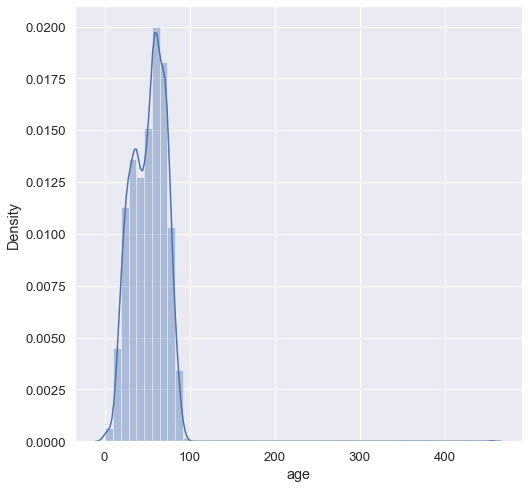

In [41]:
sns.distplot(df['age'])

##### 4.2.1) Visualización de los valores de la columna "age".

D:\Anaconda\envs\tf-keras\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


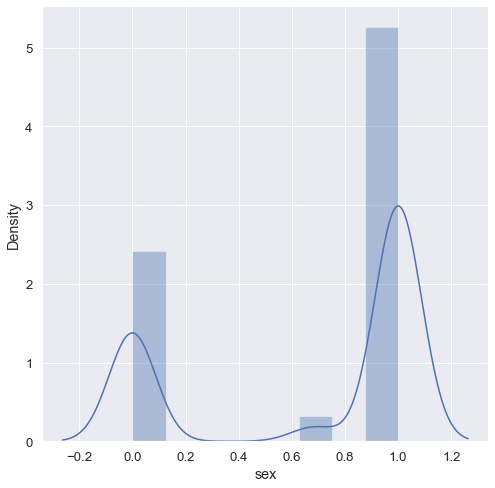

In [42]:
sns.distplot(df['sex'])

##### 4.2.2) Visualización de los valores de la columna "sex". Recordar que fueron reemplazados los valores **F por 1** y **M por 0**.

D:\Anaconda\envs\tf-keras\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


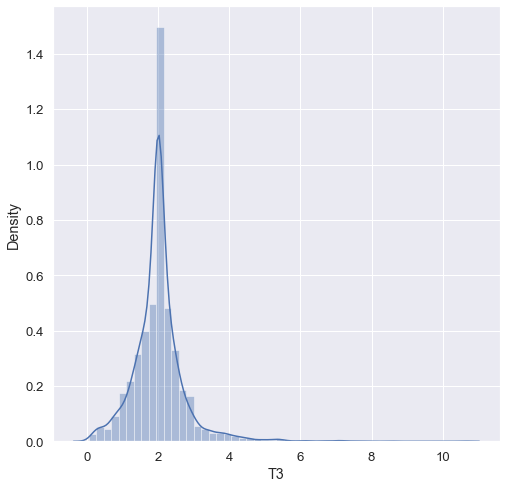

In [43]:
sns.distplot(df['T3'])

##### 4.2.3) Visualización de los valores de la columna "T3", Triyodotironina, una hormona tiroidea producida por la glándula tiroides. Regula el metabolismo y la función celular en todo el cuerpo.

##### Cuando los niveles de T3 son muy bajos, se puede diagnosticar hipotiroidismo, lo que significa que la glándula tiroides no produce suficiente cantidad de hormonas tiroideas. El hipotiroidismo puede causar una variedad de síntomas, como fatiga, aumento de peso, piel seca y escamosa, sensibilidad al frío, estreñimiento y depresión.

##### Por otro lado, si los niveles de T3 son muy altos, se puede diagnosticar hipertiroidismo, lo que significa que la glándula tiroides produce demasiada hormona tiroidea. El hipertiroidismo puede causar una variedad de síntomas, como pérdida de peso, sudoración excesiva, nerviosismo, insomnio, aumento de la frecuencia cardíaca, problemas de la vista y debilidad muscular.

D:\Anaconda\envs\tf-keras\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


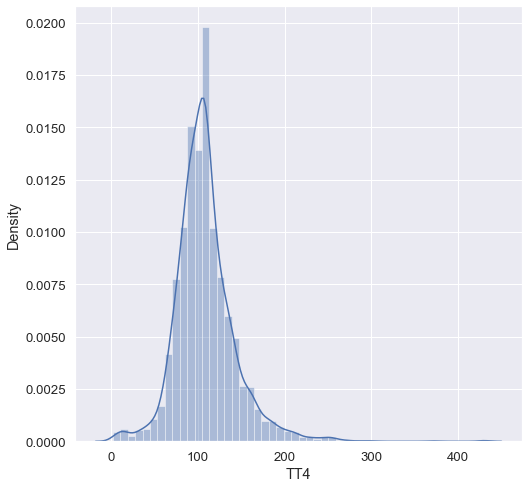

In [44]:
sns.distplot(df['TT4'])

##### 4.2.4) Visualización de los valores de la columna "TT4" Tiroxina total, otra hormona tiroidea producida por la glándula tiroides. Al igual que la T3, regula el metabolismo y la función celular en todo el cuerpo.

##### Cuando los niveles de TT4 son muy bajos, se puede diagnosticar hipotiroidismo, lo que significa que la glándula tiroides no produce suficiente cantidad de hormonas tiroideas. El hipotiroidismo puede causar una variedad de síntomas, como fatiga, aumento de peso, piel seca y escamosa, sensibilidad al frío, estreñimiento y depresión.

##### Por otro lado, si los niveles de TT4 son muy altos, se puede diagnosticar hipertiroidismo, lo que significa que la glándula tiroides produce demasiada hormona tiroidea. El hipertiroidismo puede causar una variedad de síntomas, como pérdida de peso, sudoración excesiva, nerviosismo, insomnio, aumento de la frecuencia cardíaca, problemas de la vista y debilidad muscular.

D:\Anaconda\envs\tf-keras\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


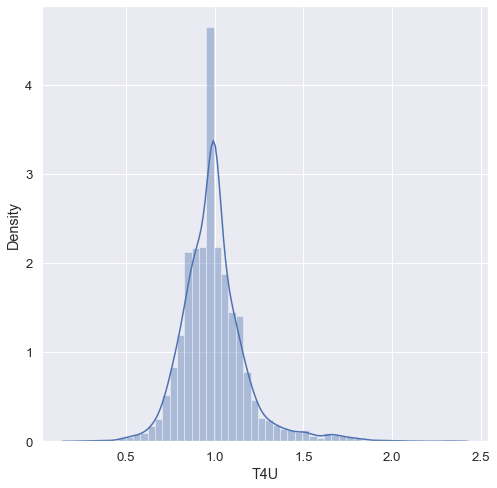

In [45]:
sns.distplot(df['T4U'])

##### 4.2.5) Visualización de los valores de la columna "T4U" Índice de captación de tiroxina, que mide la cantidad de tiroxina que se une a las proteínas transportadoras en la sangre.

##### Cuando los niveles de T4U son muy bajos, puede indicar hipotiroidismo, que es una disminución en la producción de hormonas tiroideas por la glándula tiroides. En este caso, hay una menor cantidad de T4 disponible para unirse a las proteínas transportadoras, lo que puede provocar una disminución en la T4U.

##### Por otro lado, si los niveles de T4U son muy altos, puede ser un signo de hipertiroidismo, que es una condición en la cual hay una producción excesiva de hormonas tiroideas por la glándula tiroides. En este caso, hay una mayor cantidad de T4 disponible para unirse a las proteínas transportadoras, lo que puede provocar un aumento en la T4U.

D:\Anaconda\envs\tf-keras\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


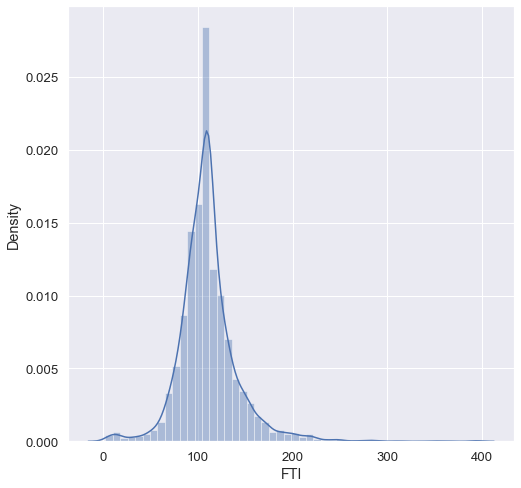

In [46]:
sns.distplot(df['FTI'])

##### 4.2.6) Visualización de los valores de la columna "FTI" Índice de tiroxina libre, que mide la cantidad de tiroxina que no está unida a las proteínas transportadoras en la sangre.

##### Cuando los niveles de FTI son muy bajos, puede indicar hipotiroidismo, que es una disminución en la producción de hormonas tiroideas por la glándula tiroides o una disminución en la conversión de T4 a T3. Esto puede provocar una serie de síntomas, como fatiga, aumento de peso, intolerancia al frío y cambios en la piel y el cabello.

##### Por otro lado, si los niveles de FTI son muy altos, puede ser un signo de hipertiroidismo, que es una condición en la cual hay una producción excesiva de hormonas tiroideas por la glándula tiroides. En este caso, los síntomas pueden incluir pérdida de peso, sudoración excesiva, intolerancia al calor y cambios en el estado de ánimo.

##### 4.3) Relacionamos algunas columnas, con el fin de ir entendiendo relaciones posibles:

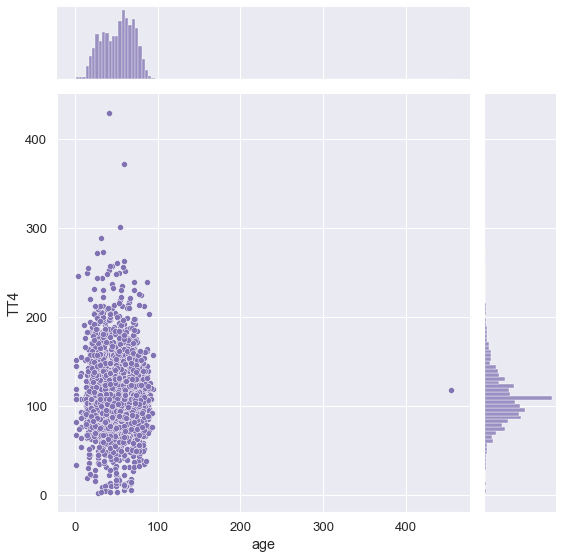

In [47]:
sns.jointplot(x='age', y='TT4', data=df, kind='scatter', height=8, color='m')

##### 4.3.1) La anterior sentencia de código muestra una visualización (gráfico de dispersión) de cómo la columna "age" se relaciona con la columna "TT4" en el conjunto de datos df.

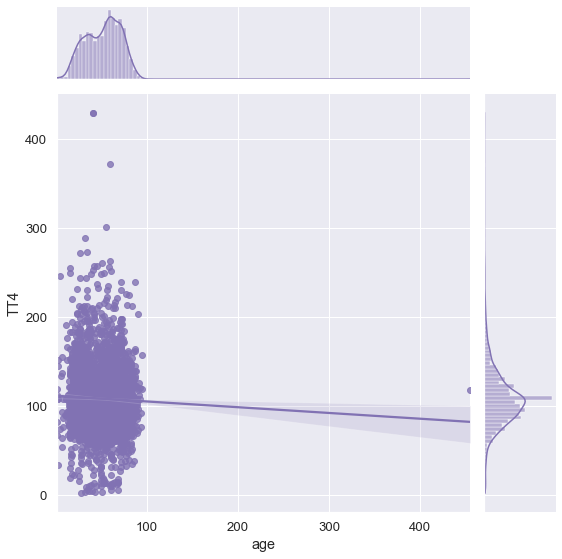

In [48]:
sns.jointplot(x='age', y='TT4', data=df, kind='reg', height=8, color='m')

##### 4.3.2) La anterior sentencia de código muestra una visualización (gráfico de dispersión con una linea de regresión) de cómo la columna "age" se relaciona con la columna "TT4" en el conjunto de datos df.

D:\Anaconda\envs\tf-keras\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


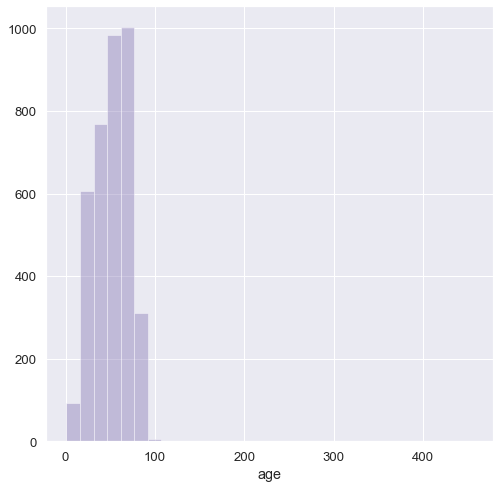

In [49]:
sns.distplot(df['age'], kde=False, bins=30, color='m')

##### 4.4) La anterior sentencia de código muestra una visualización (gráfico de barras) de la columna "age" según su cantidad en el conjunto de datos df.

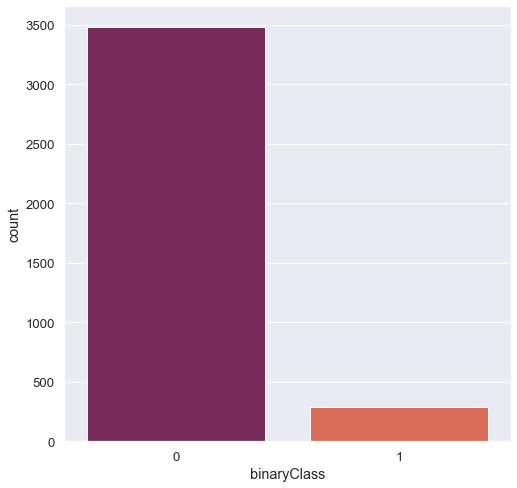

In [50]:
sns.countplot(x='binaryClass', data=df, palette='rocket')

##### 4.5) La anterior sentencia de código muestra una visualización (gráfico de barras) de la columna "binaryClass" según su cantidad en el conjunto de datos df. 

##### La columna "binaryClass" es la variable objetivo del conjunto de datos y indica si el paciente tiene o no una enfermedad tiroidea. Reemplazamos los valores **1: Positivo** y **0: Negativo**.

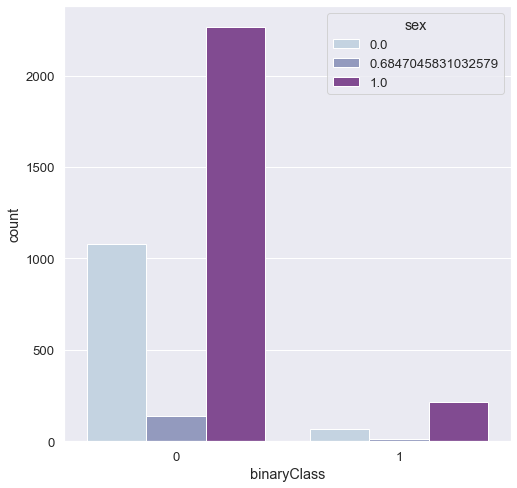

In [51]:
sns.countplot(x='binaryClass', data=df, hue='sex', palette='BuPu')

##### 4.5.1) La anterior sentencia de código muestra una visualización (gráfico de barras) de la columna "binaryClass" relacionada con la columna "sex", según su cantidad en el conjunto de datos df. 

##### La columna "binaryClass" es la variable objetivo del conjunto de datos y indica si el paciente tiene o no una enfermedad tiroidea. Reemplazamos los valores **1: Positivo** y **0: Negativo**.

##### Recordar que fueron reemplazados los valores **F por 1** y **M por 0**, para la columna "sex".

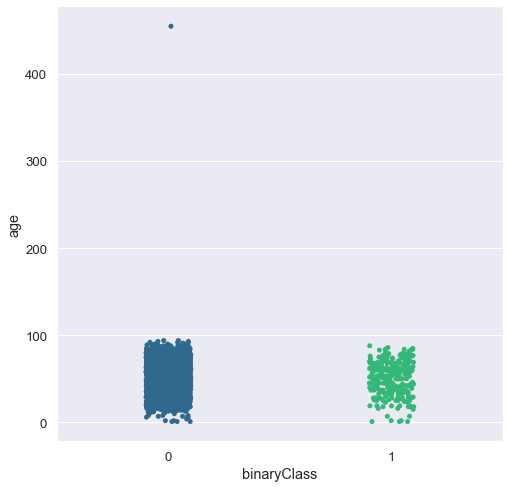

In [52]:
sns.stripplot(x="binaryClass", y="age", data=df, palette="viridis")

##### 4.5.2) La anterior sentencia de código muestra una visualización (gráfico de dispersión) de la columna "binaryClass" relacionada con la columna "age", según su cantidad en el conjunto de datos df. 

##### La columna "binaryClass" es la variable objetivo del conjunto de datos y indica si el paciente tiene o no una enfermedad tiroidea. Reemplazamos los valores **1: Positivo** y **0: Negativo**.

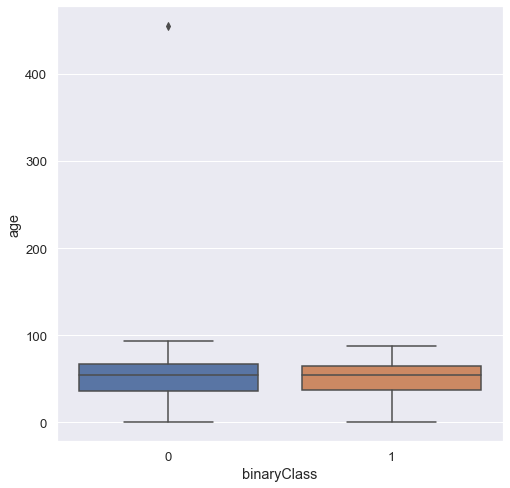

In [53]:
sns.boxplot(x='binaryClass', y='age', data=df)

##### 4.5.3) La anterior sentencia de código muestra una visualización (gráfico de caja) de la columna "binaryClass" relacionada con la columna "age", según su cantidad en el conjunto de datos df. 

##### La columna "binaryClass" es la variable objetivo del conjunto de datos y indica si el paciente tiene o no una enfermedad tiroidea. Reemplazamos los valores **1: Positivo** y **0: Negativo**.

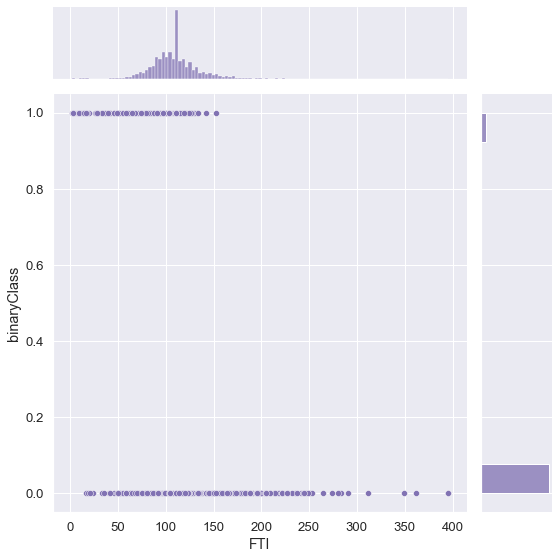

In [54]:
sns.jointplot(x='FTI', y='binaryClass', data=df, kind='scatter', height=8, color='m')

##### 4.5.4) La anterior sentencia de código muestra una visualización (gráfico de dispersión) de la columna "binaryClass" relacionada con la columna "FTI", según su cantidad en el conjunto de datos df. 

##### La columna "binaryClass" es la variable objetivo del conjunto de datos y indica si el paciente tiene o no una enfermedad tiroidea. Reemplazamos los valores **1: Positivo** y **0: Negativo**.

##### La columna "FTI" Índice de tiroxina libre, que mide la cantidad de tiroxina que no está unida a las proteínas transportadoras en la sangre.

##### 4.6) Tras lo anterior, podemos verificar en una matriz, las correlaciones entre cada una de las columnas, con el fin de ver alguna relación directa o inversamente proporcional

In [55]:
df_corr = df.corr()

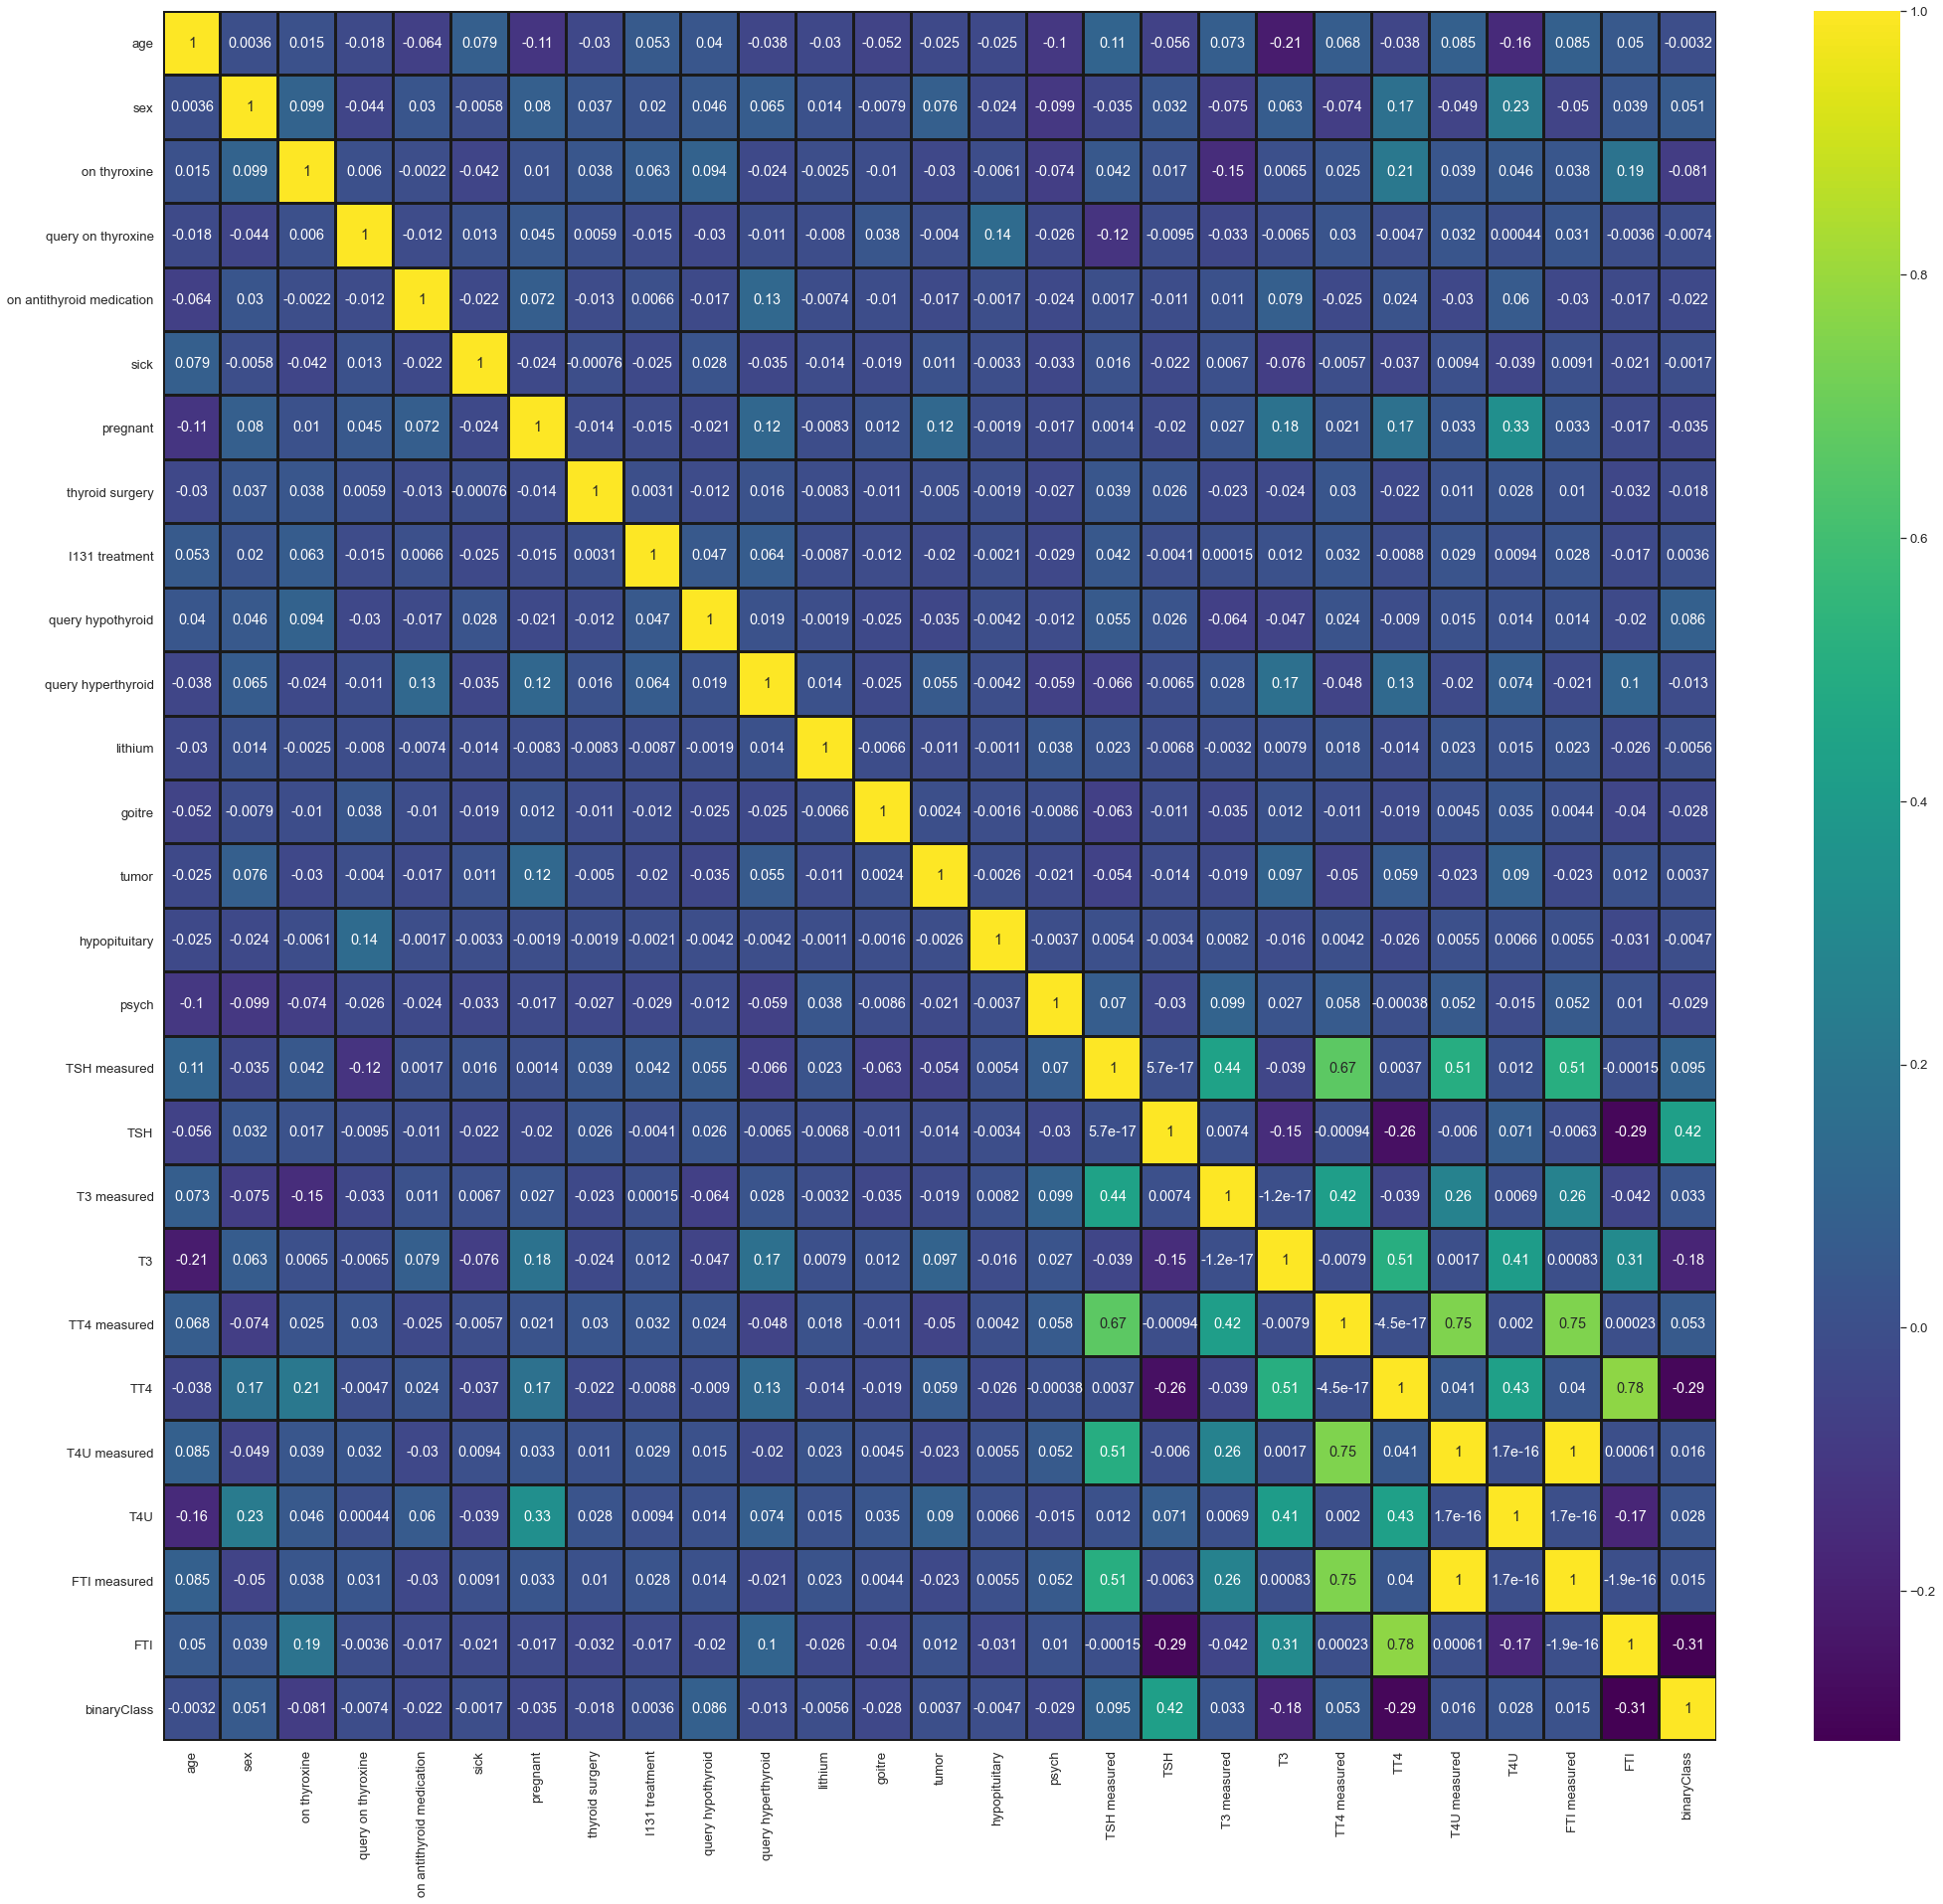

In [56]:
fig, ax = plt.subplots(figsize=(35,32))
sns.heatmap(df_corr, cmap='viridis', linecolor='k', linewidths=2, annot=True, ax=ax)

##### 4.6.1) La anterior línea de código muestra un mapa de calor que representa la correlación entre las variables del conjunto de datos df. Los colores más oscuros indican una correlación más fuerte entre las variables y los valores numéricos indican la magnitud de la correlación.

#### 5) Modelo preliminar

##### 5.1) Ahora, podemos determinar los subsets según uno que incluya nuestra variable objetivo "binaryClass" (subset "y") y otra que no la considere (subset "x")

In [57]:
x = df.drop('binaryClass', axis=1)
y = df['binaryClass']

5.1.1) Visualización del subset "x":

In [58]:
x

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1,1.300000,1,2.5000,1,125.000000,1,1.140,1,109.000000
1,23.0,1.0,0,0,0,0,0,0,0,0,...,1,4.100000,1,2.0000,1,102.000000,0,0.995,0,110.469649
2,46.0,0.0,0,0,0,0,0,0,0,0,...,1,0.980000,0,2.0135,1,109.000000,1,0.910,1,120.000000
3,70.0,1.0,1,0,0,0,0,0,0,0,...,1,0.160000,1,1.9000,1,175.000000,0,0.995,0,110.469649
4,70.0,1.0,0,0,0,0,0,0,0,0,...,1,0.720000,1,1.2000,1,61.000000,1,0.870,1,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,1.0,0,0,0,0,0,0,0,0,...,0,5.086766,0,2.0135,0,108.319345,0,0.995,0,110.469649
3768,68.0,1.0,0,0,0,0,0,0,0,0,...,1,1.000000,1,2.1000,1,124.000000,1,1.080,1,114.000000
3769,74.0,1.0,0,0,0,0,0,0,0,0,...,1,5.100000,1,1.8000,1,112.000000,1,1.070,1,105.000000
3770,72.0,0.0,0,0,0,0,0,0,0,0,...,1,0.700000,1,2.0000,1,82.000000,1,0.940,1,87.000000


5.1.2) Visualización del subset "y":

In [59]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3767    0
3768    0
3769    0
3770    0
3771    0
Name: binaryClass, Length: 3772, dtype: int64

5.2) Tras lo anterior, podemos realizar una regresión lineal múltiple, con el de obtener el intercepto en el modelo de regresión (ya que es una ecuación lineal); ajustamos el modelo de regresión lineal a los datos de entrada "x" y los datos de salida "y"; ajustamos nuevamente al datos, calculamos los coeficientes de regresión, el intercepto y otros estadísticos relacionados; por último, una linea con el detalle del modelo resultante:

In [60]:
x = sm.add_constant(x)
results = sm.OLS(y,x).fit()
results.summary()

D:\Anaconda\envs\tf-keras\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            binaryClass   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     48.57
Date:                Fri, 14 Apr 2023   Prob (F-statistic):          1.41e-213
Time:                        18:42:44   Log-Likelihood:                 179.17
No. Observations:                3772   AIC:                            -304.3
Df Residuals:                    3745   BIC:                            -136.0
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0334      0.058      0.578      0.563      -0.080       0.147
age                       -4.813e-05      0.000     -0.242      0.809      -0.000       0.000
sex                           0.0343      0.009      3.943      0.000       0.017       0.051
on thyroxine                 -0.0530      0.012     -4.339      0.000      -0.077      -0.029
query on thyroxine            0.0377      0.034      1.109      0.268      -0.029       0.104
on antithyroid medication    -0.0469      0.036     -1.299      0.194      -0.118       0.024
sick                         -0.0130      0.020     -0.660      0.509      -0.052       0.026
pregnant                     -0.0573      0.035     -1.654      0.098      -0.125       0.011
thyroid surgery              -0.0964      0.032     -2.989      0.003      -0.160      -0.033
I131 treatment               -0.0086      0.031     -0.279      0.780      -0.069       0.052
query hypothyroid             0.0718      0.016      4.520      0.000       0.041       0.103
query hyperthyroid            0.0258      0.016      1.593      0.111      -0.006       0.057
lithium                      -0.0436      0.055     -0.794      0.427      -0.151       0.064
goitre                       -0.0680      0.040     -1.693      0.091      -0.147       0.011
tumor                         0.0327      0.024      1.344      0.179      -0.015       0.080
hypopituitary                -0.2020      0.234     -0.862      0.389      -0.661       0.257
psych                        -0.0225      0.018     -1.258      0.208      -0.058       0.013
TSH measured                  0.1060      0.018      5.802      0.000       0.070       0.142
TSH                           0.0040      0.000     22.821      0.000       0.004       0.004
T3 measured                  -0.0199      0.011     -1.808      0.071      -0.041       0.002
T3                           -0.0216      0.006     -3.348      0.001      -0.034      -0.009
TT4 measured                  0.0202      0.029      0.704      0.481      -0.036       0.077
TT4                          -0.0016      0.000     -3.641      0.000      -0.002      -0.001
T4U measured                  0.1140      0.165      0.691      0.490      -0.209       0.437
T4U                           0.1602      0.055      2.920      0.004       0.053       0.268
FTI measured                 -0.1421      0.165     -0.863      0.388      -0.465       0.181
FTI                       -5.955e-05      0.000     -0.133      0.894      -0.001       0.001
==============================================================================
Omnibus:                     2079.207   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14879.706
Skew:                     

5.3) Ahora, podemos determinar nuestros subset de entrenamiento y prueba, de acuerdo a los dos anteriormente creados ("y" e "x")

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

5.3.1) Verificamos nuestro subset "x", según columnas y filas:

In [62]:
x.shape

(3772, 27)

5.4) Realizamos ahora el proceso de normalización, que implica escalar las características de los datos para que tengan media cero y una desviación estándar de uno. Primero, el objeto StandardScaler se ajusta a los datos de entrenamiento x_train utilizando el método fit(), que calcula la media y la desviación estándar de cada característica. Luego, el método transform() se utiliza para transformar tanto los datos de entrenamiento x_train como los datos de prueba x_test, de modo que ambas muestras tengan la misma escala. Esto se hace para que el modelo no se vea influenciado por la escala de los datos y así el rendimiento del modelo sea mejor.

In [63]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

5.5) Inicializamos las librerías asociadas a keras, con el fin de poder aplicar RNA (red neuronal artificial)

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

5.5.1) La primera capa es una capa densa con 256 neuronas, que espera una entrada de tamaño x.shape[1] (el número de columnas en los datos de entrada). La función de activación utilizada en esta capa es la función de activación "relu", que es una función lineal rectificada que se utiliza comúnmente en las capas ocultas de las redes neuronales.

Después de la primera capa, se agrega una capa de "Dropout" con una tasa de abandono del 0,4. Esta capa tiene como objetivo reducir el overfitting (sobreajuste) al desactivar aleatoriamente algunas de las neuronas de la capa anterior durante el entrenamiento.

La segunda capa es otra capa densa con 128 neuronas y la misma función de activación "relu". Después de esto, se agrega otra capa de Dropout con una tasa de abandono del 0,3.

La tercera capa es una capa densa con 63 neuronas y la función de activación "relu". Se agrega otra capa de Dropout con una tasa de abandono del 0,2.

Finalmente, se agrega una capa densa de salida con una única neurona y la función de activación "sigmoid", que se utiliza para la clasificación binaria. La función de activación "sigmoid" devuelve valores en el rango de 0 a 1, que se interpretan como la probabilidad de que la entrada pertenezca a la clase positiva (1) o la clase negativa (0).

In [65]:
model = Sequential()
model.add(Dense(256, input_shape=[x.shape[1]], activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(63, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

5.5.2) Detalle de nuestra secuencia:

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               7168      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 63)                8127      
_________________________________________________________________
dropout_2 (Dropout)          (None, 63)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6

5.5.3) Detalle de nuestra secuencia a nivel gráfico de nuestra arquitectura de la red neuronal:

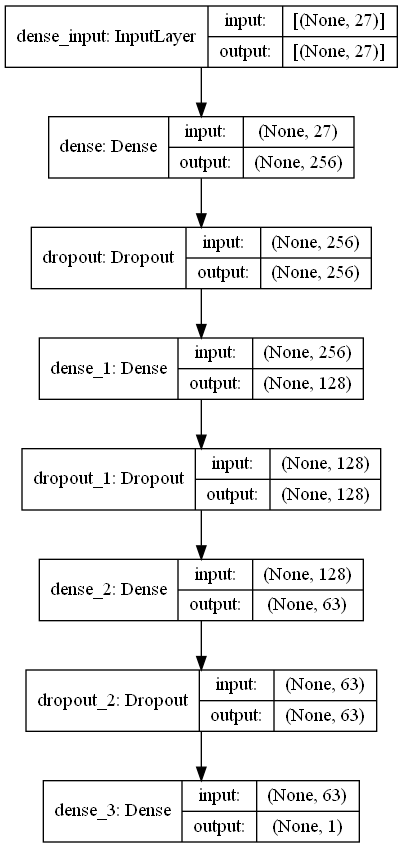

In [67]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png') 

5.6) Ahora, a nuestro modelo, aplicamos un algoritmo de optimización, la función de pérdidfa y las métricas para evaluar el rendimiento, por ejemplo:

"optimizer": especifica el algoritmo de optimización que se utilizará para ajustar los pesos de la red neuronal durante el entrenamiento. En este caso, se utiliza Adam, un algoritmo de optimización basado en gradiente que es eficiente para grandes conjuntos de datos.

"loss": especifica la función de pérdida que se utilizará para evaluar la diferencia entre la salida del modelo y la variable de destino (etiqueta verdadera). En este caso, se utiliza la entropía cruzada binaria, que es adecuada para problemas de clasificación binaria.

"metrics": especifica la métrica que se utilizará para evaluar el rendimiento del modelo. En este caso, se utiliza la precisión (accuracy) para medir qué tan bien el modelo puede predecir correctamente las etiquetas de clase para los datos de prueba.

In [68]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

5.7) Para mejorar el entrenamiento, se pueden utilizar tres técnicas comunes para modelos de redes neuronales, por ejemplo:

"ReduceLROnPlateau": Esta técnica disminuye la tasa de aprendizaje (learning rate) del modelo si la métrica de validación (en este caso, la pérdida o loss) no mejora después de un cierto número de épocas. La idea detrás de esto es que disminuir la tasa de aprendizaje puede ayudar al modelo a converger a un mínimo local mejor en caso de que esté oscilando alrededor de él.

"ModelCheckpoint": Esta técnica guarda el modelo después de cada época si la métrica de validación mejora. De esta manera, si el modelo comienza a sobreajustarse (overfitting) a los datos de entrenamiento, se pueden restaurar versiones anteriores del modelo que obtuvieron mejores resultados en la validación.

"EarlyStopping": Esta técnica detiene el entrenamiento del modelo si la métrica de validación no mejora después de un cierto número de épocas (patience). La idea detrás de esto es evitar que el modelo continúe entrenando durante demasiado tiempo y comience a sobreajustarse a los datos de entrenamiento.

In [69]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 20,
                         verbose = 1,
                         factor = 0.75,
                         min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=20)

5.8) Por último, podemos comenzar a entrenar nuestro modelo de redes neuronales, según los siguientes parametros:

"epochs" indica el número de veces que el modelo iterará sobre el conjunto de entrenamiento completo. En este caso, se realiza el entrenamiento durante 100 epochs.

"callbacks" es una lista de funciones que se ejecutarán durante el entrenamiento del modelo. En este caso, se utilizan tres callbacks: ReduceLROnPlateau, ModelCheckpoint y EarlyStopping.

"batch_size" especifica el número de ejemplos de entrenamiento que se utilizarán en cada iteración de entrenamiento.

"validation_split" indica la fracción del conjunto de entrenamiento que se utilizará como conjunto de validación.

In [70]:
%%time
history = model.fit(x=x_train, y=y_train, epochs=100, callbacks=[lrd, mcp, es], batch_size=64, validation_split=0.1)

Epoch 1/100
40/40 [==============================] - 1s 4ms/step - loss: 0.3395 - accuracy: 0.9030 - val_loss: 0.2090 - val_accuracy: 0.9258
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1967 - accuracy: 0.9344 - val_loss: 0.1575 - val_accuracy: 0.9470
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1674 - accuracy: 0.9466 - val_loss: 0.1432 - val_accuracy: 0.9505
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1526 - accuracy: 0.9493 - val_loss: 0.1151 - val_accuracy: 0.9505
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1287 - accuracy: 0.9537 - val_loss: 0.0981 - val_accuracy: 0.9611
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1312 - accuracy: 0.9580 - val_loss: 0.0819 - val_accuracy: 0.9611
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1121 - accuracy: 0.9623 - val_loss: 0.0720 - val_accuracy: 0.9753
Epoch 8/100
4

5.9) Evaluamos nuestro modelo, según los resultados finales

In [71]:
model.evaluate(x_test, y_test)

30/30 [==============================] - 0s 679us/step - loss: 0.0460 - accuracy: 0.9915


[0.04603935778141022, 0.9915164113044739]

5.10) Realizamos la predicción utilizando un modelo previamente entrenado en un conjunto de datos de prueba. En particular, model.predict(x_test) aplica el modelo "model" a los datos de prueba "x_test" para obtener las predicciones correspondientes "y_pred".

In [72]:
y_pred = model.predict(x_test)
y_pred

array([[5.38294875e-09],
       [9.25291896e-01],
       [8.03373838e-20],
       [1.04728122e-27],
       [2.67295075e-11],
       [8.02073389e-25],
       [8.82251772e-11],
       [9.68885345e-13],
       [1.38078644e-18],
       [3.08524623e-10],
       [1.46533237e-11],
       [6.71634955e-15],
       [2.99424130e-08],
       [9.99927461e-01],
       [9.89728388e-09],
       [1.09435139e-12],
       [2.78868129e-06],
       [9.08905937e-11],
       [1.94623315e-18],
       [3.56311530e-12],
       [2.07033293e-10],
       [7.54077121e-08],
       [1.57769264e-05],
       [9.52861401e-11],
       [2.72636981e-07],
       [5.08785519e-14],
       [5.12586805e-12],
       [1.43900514e-03],
       [3.31043908e-11],
       [8.89718420e-13],
       [2.93552699e-19],
       [5.59858973e-12],
       [3.14391048e-12],
       [1.21500452e-04],
       [2.71762275e-08],
       [1.07313209e-26],
       [2.19279692e-10],
       [6.14454180e-13],
       [9.32157040e-03],
       [3.55159946e-09],


5.11) Ahora, podemos gráficas nuestro modelo, según los resultados obtenidos:

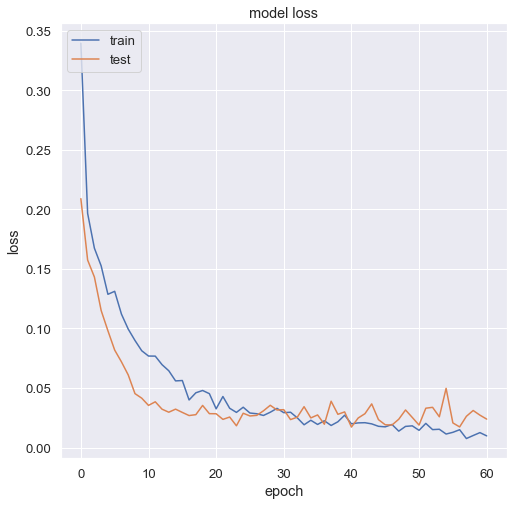

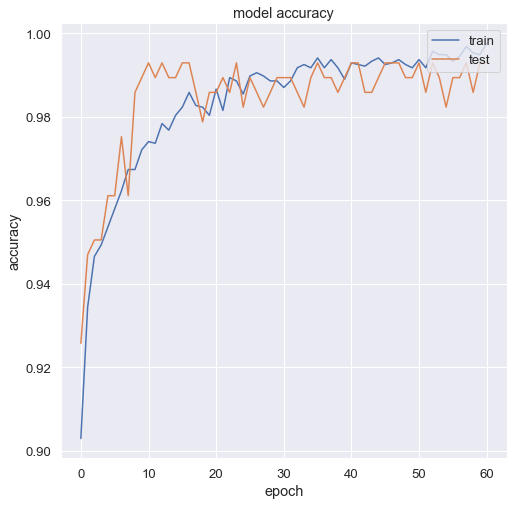

In [73]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()

# # summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [74]:
model.save('model.h5')

In [75]:
import joblib

In [76]:
joblib.dump(sc, 'scaler.pkl')

['scaler.pkl']

In [77]:
sc = joblib.load('scaler.pkl')

In [78]:
%%time
from tensorflow.keras.models import load_model
model = load_model('model.h5')
#model.predict(sc.transform([[42.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,132,1.00,1.00,109.0,1.0,0.88,.100,110.00,0.00,0]])) # Se elimino un registro, ya que no se saco una columna
#model.predict(sc.transform([[62.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,332,1.00,1.00,309.0,1.0,0.88,.100,210.00,0.00,0]])) # Prueba 2
model.predict(sc.transform([[62.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,32,1.00,1.00,39.0,1.0,0.88,.100,21.00,0.00,0]])) # Prueba 3

Wall time: 165 ms


array([[0.]], dtype=float32)

## Continuar aquí In [91]
##### https://www.kaggle.com/code/yasserhessein/thyroid-disease-detection-using-deep-learning/notebook
##### # summarize history for loss
##### plt.plot(history.history['loss'])